In [1]:
from pyts.image import GramianAngularField
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

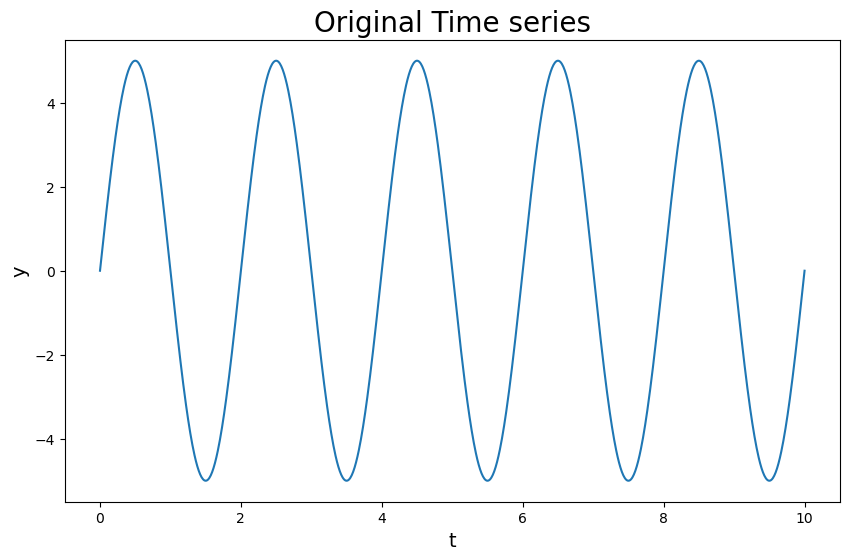

In [2]:
# Generate time series data
t = np.linspace(0, 10, 1000)
y = 5 * np.sin(np.pi * t)

# Plot time series data
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.xlabel('t', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Original Time series', fontsize=20)
plt.savefig('GAF-Original-TS.png', dpi=100, bbox_inches='tight')
plt.show()

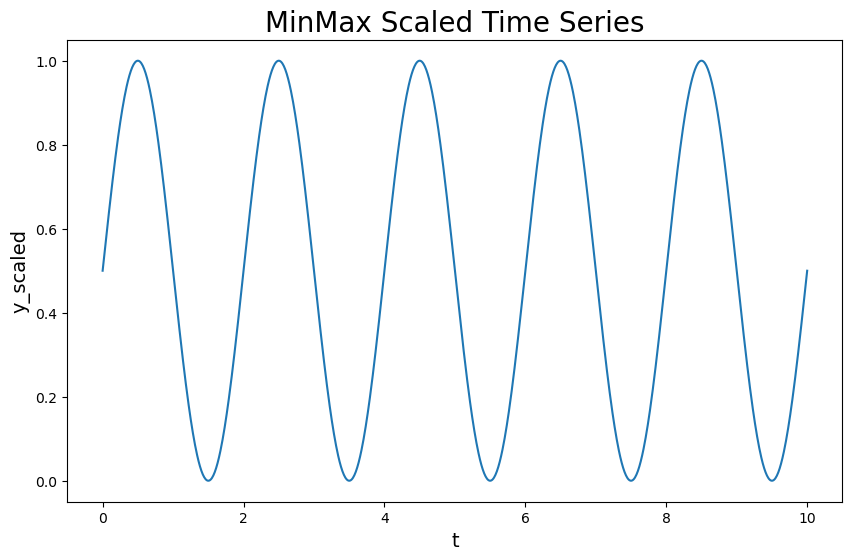

In [3]:
# MinMaxScaler to [0, 1]
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(t, y_scaled)
plt.xlabel('t', fontsize=14)
plt.ylabel('y_scaled', fontsize=14)
plt.title('MinMax Scaled Time Series', fontsize=20)
plt.savefig('GAF-MinMaxScaled-TS.png', dpi=100, bbox_inches='tight')
plt.show()

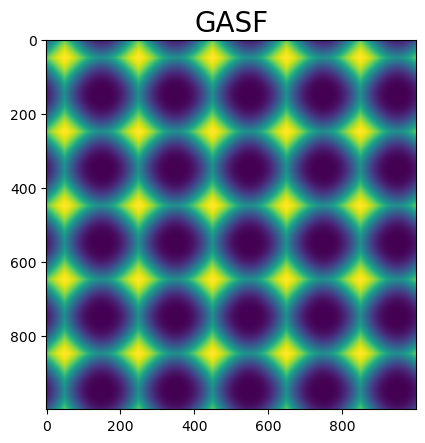

In [4]:
# Time series -> GASF
gasf_size = 1000
gasf = GramianAngularField(image_size=gasf_size, method='summation', sample_range=(0, 1))
y_gasf = gasf.fit_transform(y_scaled.reshape(1,-1)).reshape(gasf_size, gasf_size)
plt.figure()
plt.imshow(y_gasf)
plt.title('GASF', fontsize=20)
plt.savefig('GAF-GASF.png', dpi=100, bbox_inches='tight')
plt.show()

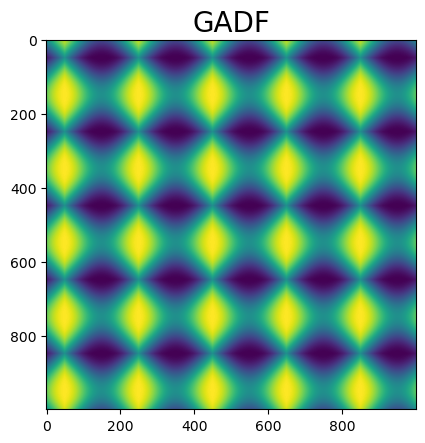

In [5]:
# Time series -> GADF
gadf_size = 1000
gadf = GramianAngularField(image_size=gasf_size, method='difference', sample_range=(0, 1))
y_gadf = gadf.fit_transform(y_scaled.reshape(1,-1)).reshape(gadf_size, gadf_size)
plt.figure()
plt.imshow(y_gadf)
plt.title('GADF', fontsize=20)
plt.savefig('GAF-GADF.png', dpi=100, bbox_inches='tight')
plt.show()

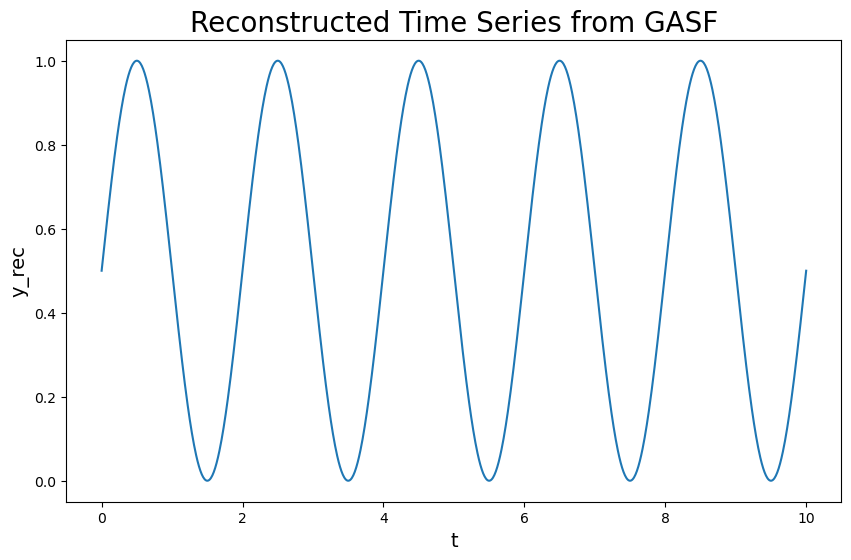

In [6]:
# GASF -> Time series
def gasf_rec(data_gasf):
    data_gasf_rec = np.array([data_gasf[i, i] for i in range(gasf_size)])
    data_gasf_rec = np.sqrt((data_gasf_rec + 1) / 2)
    return data_gasf_rec
y_rec = gasf_rec(y_gasf)
plt.figure(figsize=(10, 6))
plt.plot(t, y_rec)
plt.xlabel('t', fontsize=14)
plt.ylabel('y_rec', fontsize=14)
plt.title('Reconstructed Time Series from GASF', fontsize=20)
plt.savefig('GAF-Reconstructed-TS.png', dpi=100, bbox_inches='tight')
plt.show()